# Michelangelo's Taller 4: Procesamiento de Imágenes Camilo Narvaez  ID:428856

Chocolove está satisfecho con su trabajo analizando los datos de las ventas del restaurante y, en vista de las buenas proyecciones del negocio, considera oportuno diseñar la carta del menú. Para ello le ha compartido una carpeta llamada `Menu_Photos` con imágenes de los productos que vende en el restaurante para que las muestre en una imagen con su nombre y precio de venta. 
Se suministra un código con comentarios con el objetivo de obtener los precios de los productos y mostrar las imágenes en una matriz. El objetivo de la actividad es realizar las modificaciones solicitadas por Chocolove para obtener un menú visualmente atractivo que brinde información básica de sus productos.

**Nota:** Ejecuta las siguientes celdas antes de proceder con las actividades del taller. Se recomienda leer con atención las instrucciones suministradas.

In [1]:
# Se importan las librerías necesarias para desarrollar las actividades del taller
from restaurant import Dish, Restaurant
import csv
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Esta línea permite visualizar correctamente las gráficas generadas con matplotlib en el notebook
%matplotlib inline
# Se configuran algunos parámetros de las figuras que se van a generar. 
# 'lemonchiffon' es un named color en matplotlib. Su código RGB es (255,250,205)
plt.rcParams['figure.dpi'] = 72
plt.rcParams["figure.facecolor"] = 'lemonchiffon'
plt.rcParams["savefig.facecolor"] = 'lemonchiffon'
plt.rcParams["figure.autolayout"] = True

# Creación del restaurante Michelangelo's de Chocolove. 
michelangelos = Restaurant("Michelangelo's", "Chocolove McDonell", "221B Baker Street", "634-5789")
# Lectura de los platos del restaurante. Este archivo fue modificado para evitar el uso de tildes en los nombres de los productos.
with open('dishes.csv') as dishes_data:
    dishes_reader = csv.DictReader(dishes_data, delimiter=";")
    for row in dishes_reader:
        michelangelos.add_to_menu((Dish(row["name"], int(row["price"]), row["category"], row["description"])))

# Función para obtener el precio de un producto dado su nombre. 
# Esta función se crea para facilitar la obtención de los precios en el contexto del ejercicio actual. 
# El menu es un diccionario que se puede obtener con el método .get_menu() de Restaurant. 
def get_price(dish_name):
    menu = michelangelos.get_menu()
    dishes_prices = [(dish.get_name(), dish.get_price()) for dish in menu.values()]
    price = 'Not Found'
    # Búsqueda ordenada de precios comparando nombres. 
    # La instrucción 'break' se utiliza para salir del ciclo si se encuentra coincidencia en los nombres.
    for dish in dishes_prices:
        if dish[0] == dish_name:
            price = dish[1]
            break
    return price

Dish "Lasagna" with id 1 added to menu!
Dish "Risotto" with id 2 added to menu!
Dish "Pizza" with id 3 added to menu!
Dish "Macchiato" with id 4 added to menu!
Dish "Latte" with id 5 added to menu!
Dish "Cappuccino" with id 6 added to menu!
Dish "Espresso" with id 7 added to menu!
Dish "Panna Cotta" with id 8 added to menu!
Dish "Tiramisu" with id 9 added to menu!
Dish "Gelato" with id 10 added to menu!


In [2]:
# Ubicación de las fotografías del menú del restaurante
dir = r'./Menu_Photos'

# Lectura de los nombres de los archivos en la carpeta 'Menu_Photos'
# Se agregan los nombres de los archivos a una lista de 'filenames'
filenames = []
for i in os.listdir(dir):
    filenames.append(i)
    
# Nombres de los archivos sin la extensión
product_names = [filename.split('.')[0] for filename in filenames]

# Precios de los productos
prices = [get_price(product) for product in product_names]

### Actividades

Para las siguientes actividades, escriba su código dentro del ciclo entre las líneas de comentario. Tenga en cuenta la indentación. 

1. Crea una variable temporal `name` que sea igual al nombre del producto en la lista `product_names` para la posición actual del iterador del ciclo `i`.
2. Crea una variable temporal `price` que sea igual al precio del producto en la lista `prices` para la posición actual del iterador del ciclo `i`. Convierta este valor en un `string` y agregue el signo de pesos `$` al inicio y la moneda `COP` al final.
3. Crea una variable llamada `center` que sea una tupla de dos posiciones: el alto y el ancho de la imagen redimensionada `img_resized` dividida entre 2. El alto es la primera posición del atributo `.shape` y el ancho la segunda posición. 
4. Crea una variable llamada `cropped_image` que sea la versión recortada de `img_resized`. Esta debe tener como centro los valores de la tupla `center`, un alto de 1000px, y un ancho de 1400px. **Tip:** los límites del corte son la posición central más/menos la mitad de la dimensión esperada. Recuerda utilizar números enteros. La estructura del corte es: `img[y_min:y_max,x_min:x_max]`
5. Crea una variable llamada `flipped_image` que sea la versión volteada horizontalmente de `cropped_image`. 
6. Crea una variable llamada `contrast_image` que sea la versión con un 10% más de contraste de `flipped_image`. **Tip:** la matriz de unos multiplicada se multiplica por `1.1`. No olvides utilizar la función `.clip()` para limitar los valores. 
7. Crea una variable llamada `bright_image` que sea la versión con 20 puntos menos de brillo de `contrast_image`. 
8. Sustituye el valor de `final_image` por `bright_image`.
9. Añade dos rectángulos rellenos sobre `final_image` teniendo en cuenta los siguientes parámetros:
    - Primer rectángulo:
        - Posición inicial: (0, 30)
        - Posición final: (1000, 140)
    - Segundo rectángulo:
        - Posición inicial: (400, 860)
        - Posición final: (1400, 970)

Para ambos rectángulo utilice el color (255, 250, 205) y grosor `-1` para rellenar. 
**Tip:** Estructura del rectángulo: cv.rectangle(img, pt1, pt2, color, thickness)

10. Añade dos anotaciones sobre `final_image` teniendo en cuenta los siguientes parámetros:
    - Primer texto:
        - Texto: nombre del producto `name`
        - Posición: (100, 110)
    - Segundo text:
        - Texto: precio del producto `price`
        - Posición: (800, 950)

Para ambas anotaciones:
- Fuente: cv.FONT_HERSHEY_PLAIN
- Escala: 5
- Color: (0, 0, 0)
- Grosor: 3
- Estilo de línea: cv.LINE_AA

**Tip:** Estructura de la anotación: cv.putText(img, text, position, fontFace, fontScale, color, thickness, lineType)

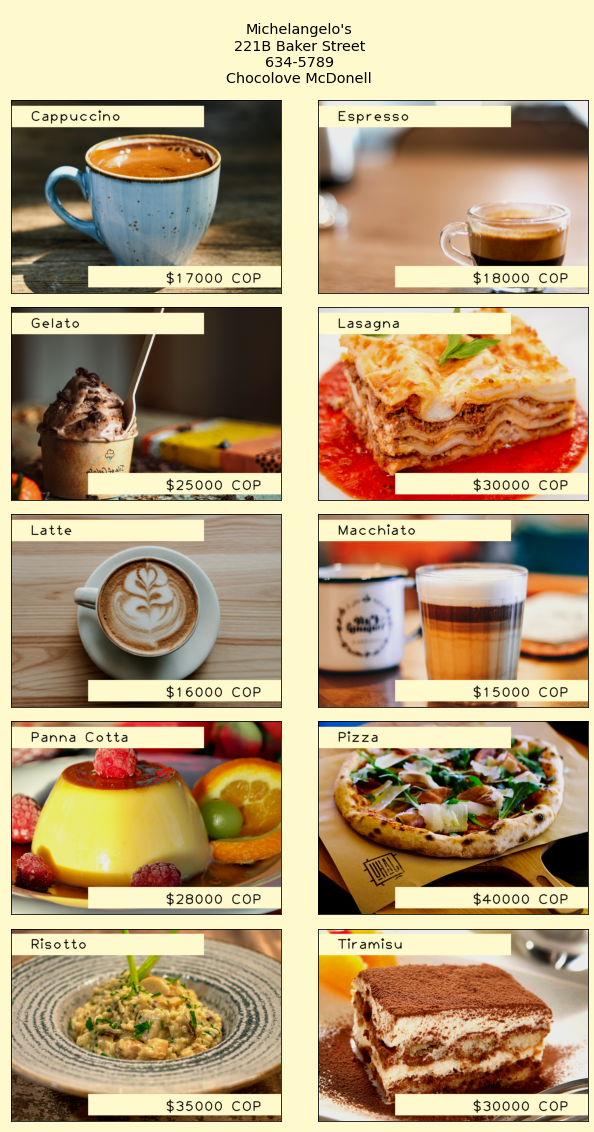

In [44]:
# Proceso de visualización de imágenes
fig, axs = plt.subplots(5, 2, figsize=(12, 16))
fig.subplots_adjust(hspace = .1, wspace=.0001)
plt.suptitle(f"{michelangelos}", fontsize='x-large')

axs = axs.ravel()
desired_height = 1200

for i in range(len(filenames)):
    img = cv.imread(os.path.join(dir, filenames[i]))
    aspect_ratio = desired_height/img.shape[0]
    desired_width = int(img.shape[1]*aspect_ratio)
    dim = (desired_width, desired_height)
    img_resized = cv.resize(img, dsize=dim, interpolation=cv.INTER_AREA)[:,:,::-1]
    
    #----------------------------------------------------------------------------------------------------
    # Su solución aquí!!! No borres las demás lineas de código ;) y ten en cuenta la indentación (CHECK).
    # Actividades:
    #1
    name = product_names[i]
    #2
    price = '$' + str(prices[i]) + ' COP'
    #3
    center = (img_resized.shape[0] // 2, img_resized.shape[1] // 2)
    #4
    y_min = center[0] - 1000//2
    y_max = center[0] + 1000//2
    x_min = center[1] - 1400//2
    x_max = center[1] + 1400//2
    cropped_image = img_resized[y_min:y_max, x_min:x_max]
    #5
    flipped_image = cv.flip(cropped_image, 1)
    #6
    contraste= np.ones(flipped_image.shape) * 1.1
    contrast_image = np.uint8(np.clip(cv.multiply(np.float64(flipped_image), contraste),0,255))
    #7
    brillo = np.ones(contrast_image .shape, dtype='uint8')*20
    bright_image =  cv.subtract(contrast_image , brillo)
    #8
    final_image =  bright_image.copy()
    #9
    cv.rectangle(final_image, (0, 30), (1000, 140), (255, 250, 205), -1) 
    cv.rectangle(final_image, (400, 860), (1400, 970), (255, 250, 205), -1)
    #10
    cv.putText(final_image, name, (100, 110), cv.FONT_HERSHEY_PLAIN, 5, (0, 0, 0), 3, cv.LINE_AA)
    cv.putText(final_image, price, (800, 950), cv.FONT_HERSHEY_PLAIN, 5, (0, 0, 0), 3, cv.LINE_AA)
    #------------------------------------------------------------------------------------------------------------
    
    axs[i].imshow(final_image, cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.savefig('Menu_Photos.png')